# SHELXL Bulk Refinement Tutorial

Have you ever collected multiple datasets of the same structure? Perhaps you have run a variable temperature experiment and now find yourself with 50 identical datasets to refine. You may have sighed - your data only took an hour to collect, but now you find yourself staring down the barrel of weeks of repetitive work. Now, there is a better way. 

*This is a tutorial to automatically refine a series of identical structures based on a single reference structure.*

This code works by essentially 'copying and pasting' the atomic coordinates of a reference structure into established '.ins' files and running a series of refinements through SHELXL against each unique reflection file. This tutorial will show how this is done by breaking the code down into steps. 

This module is also a part of a bigger library of modules designed to increase the efficiency and throughput of crystallographic processing https://github.com/erikssod/CXpipeline 

### Important considerations

This specific code requires unchanging symmetry through the collection. More advanced versions of the script can import multiple reference structures.

### What you need to get started
* A variable temperature collection with unchanging symmetry
* One structure refined to publication-standard 

## Tutorial Task 1 
* Import a reference structure into a fresh .ins file (one that has been set up but does not contain any atoms)

# A fresh .ins file

A sample .ins file is presented below. This is the file (in conjunction with your .hkl reflection file) that would normally be presented to SHELXT (or other structure solution program). Notice that there are no atomic coordinates yet, only the cell, symmetry and expected contents are defined. 

As we are importing a reference structure of identical symmetry, only the top three lines (TITL, CELL and ZERR) are unique to this .ins file. 

# A reference .ins file

A sample reference .ins file is presented below (published data of a simple complex: [Cu(acac)2]). This is the final file with the structure refined to the standard you wish all others to be refined to. Depending on what software was used for this process, the file may be littered with 'REM' commands - these are the equivalent of comments and are not executed by SHELXL. The only part of this file we don't want to transfer is the unit cell, as this will be different across experiments (and likely holds the information we're investigating!)


[Cu(acac)2] Reference: Worthy, A., Grosjean, A., Pfrunder, M. et al. Atomic resolution of structural changes in elastic crystals of copper(II) acetylacetonate. Nature Chem 10, 65–69 (2018). https://doi.org/10.1038/nchem.2848

# A simple function to import a refinement from a different .ins file

Key Coding Concepts:
* A function takes an **input**, performs a series of tasks on it, then produces an **output** - in this case, we give our **new .ins file** and location of the **full .ins file** to the import_refinement function, it inserts the reference structure and provides the **full .ins file** ready for refinement
* For now, the new and final file should be separated so that we can understand what the code is doing - later, the code will overwrite the original .ins file, as the structure is being imported *into* the file

#### Import Python Libraries

First, we are required to import libraries that our code will make use of. Python is very powerful in the wide range of libraries available to make our code more efficient - there is no use re-coding something that someone has already coded!

In [40]:
# Path library required to use paths on different file systems
import pathlib

# The re library allows for easy searching of files
import re

#### Define Variables

Second, we need to set up our variables. We use variables to make our base code more general and re-usable. In this case, our variables are the paths of the various files. 

In [41]:
# Define the path of the reference structure
reference_path = pathlib.Path(
    r"/home/amy/Documents/analysis/shelxl_tutorial/work/ref.ins"
)

# Define the path of the .ins file you want the reference imported into
new_file = pathlib.Path(r"/home/amy/Documents/analysis/shelxl_tutorial/work/new.ins")

# Define the path to output the final .ins file
final_file = pathlib.Path(
    r"/home/amy/Documents/analysis/shelxl_tutorial/work/combined.ins"
)

#### Path Check

We need to make sure our paths are valid. The exact syntax may change across operating systems, so use this to see if the path you entered above can be found by the code.

In [43]:
# Check to determine that the file paths are valid

if os.path.exists(reference_path) == True:
    print("You have successfully entered a valid path for the reference structure")
else:
    print("Check your syntax for the path of your reference structure - path not valid")

if os.path.exists(new_file) == True:
    print("You have successfully entered a valid path for the new structure")
else:
    print("Check your syntax for the path of your new structure - path not valid")

if (
    os.path.isdir(pathlib.Path(final_file).parent)
    and ".ins" in pathlib.Path(final_file).name
):
    print("You have successfully entered a valid path to place your combined file")
elif (
    os.path.isdir(pathlib.Path(final_file).parent)
    and ".ins" not in pathlib.Path(final_file).name
):
    print("Please put the desired name of your .ins file at the end of the path")
else:
    print("Check your syntax for the path of your combined file")

You have successfully entered a valid path for the reference structure
You have successfully entered a valid path for the new structure
You have successfully entered a valid path to place your combined file


#### The Function 

A function is also an efficient way of writing re-usable, organised code. However, it requires calling before it will run. You will notice that running the below block of code won't actually do anything, but it is still required for Jupyter to know that this function exists. 

In [54]:
# Defines the function which imports the reference structure into the specified file_name


def import_file(file_name_new, file_name_final):

    # First, we open the reference file, and identify everything between 'LATT' and 'END'
    with open(reference_path, "rt") as reference:
        ref = reference.read()
    ref_x = re.search("LATT", ref)
    ref_y = re.search("END", ref)

    # Then, we open the new file and identify the new cell - everything from 'TITL' to 'LATT'
    # The power in using the re library lies in the fact that this ignores any REM comments or strange formatting
    with open(file_name_new, "rt") as new_file:
        new_cell = new_file.read()
    new_x = re.search("TITL", new_cell)
    new_y = re.search("LATT", new_cell)

    if new_x is None or new_y is None or ref_x is None or ref_y is None:
        print(
            "Invalid file - check that you have the correct syntax in the file with reference to the above two examples"
        )
        print(
            "Particularly check for the presence of TITL, LATT, and END in your files"
        )
    else:
        # Combine the files
        complete_file = (
            new_cell[new_x.start() : new_y.start()] + ref[ref_x.start() : ref_y.end()]
        )

    # Finally, we need to write this out to our new file
    with open(file_name_final, "w") as combined:
        for line in complete_file:
            combined.write(line)

#### Calling the Function

Here we call the function and print the final file to see what the code has done

In [55]:
# Calls the function import_refinement with the path to the new_file as the input
import_file(new_file, final_file)


# Prints the new file below for demonstration purposes
with open(final_file, "rt") as reference:
    for line in reference:
        print(line)

TITL temp in P2(1)/n  

CELL 0.71073   4.76485  16.81229   7.91913  90.0000 107.3114  90.0000

ZERR    4.00   0.00041   0.00115   0.00063   0.0000   0.0094   0.0000

LATT 1

SYMM 0.5-X,0.5+Y,0.5-Z

SFAC C H Cl Cu O

UNIT 20 24 4 2 8



L.S. 4 0 0

PLAN  5

CONF

BOND 

LIST 6

MORE -1

BOND $H

fmap 2 53

SHEL 10 0.75

WGHT 0.0567 0.3847

FVAR 2.26719

REM <olex2.extras>

REM <HklSrc "%.\\Sjkc20ac03a_01_100_00.hkl">

REM </olex2.extras>



Cu1   4     1.00000  0.50000  0.50000  10.50000  0.01412  0.01400  0.00959 =

 0.00029  0.00348  0.00208 

Cl1   3     0.27577  0.68830  0.62116  11.00000  0.01567  0.01667  0.01774 =

 -0.00207  0.00619  0.00202 

O1    5     0.89611  0.52676  0.70847  11.00000  0.01649  0.01645  0.01209 =

 0.00002  0.00388  0.00347 

O2    5     0.72078  0.57197  0.35600  11.00000  0.01571  0.01535  0.01232 =

 -0.00031  0.00330  0.00194 

C2    1     0.70247  0.57696  0.72153  11.00000  0.01510  0.01306  0.01256 =

 -0.00269  0.00274 -0.00340 

C4    1     0.5429

# Refining Multiple Structures 

The next step is to import the reference structure into a series of other datasets *(this could be provided?)*. Once we have done this, we will run a single refinement of SHELXL in each folder to demonstrate. 

## Tutorial Task 2

* Import reference structure into a series of other datasets
* Execute a single refinement of SHELXL on each 
    

# Sample Directory Tree

First, you need to prepare your directory tree. The 'working directory' is where the scripts will be executed. The exact location of the reference file is not important, so long as it is outside of the working directory. 

![title](graphics/directory_tree_diagram.jpg)

# A simple function to import a refinement and run SHELXL over a series of folders

Key Coding Concepts:
* This code uses a library called 'subprocess' which interacts with the command line. As SHELXL can be executed directly from the command line, this library allows for us to do the same thing without ever opening the terminal!  

#### Importing our Libraries 

For the next function, some additional python libraries are required.

In [7]:
# Libraries required to interact with directory tree and command line
import os
import shutil
import subprocess
import pathlib

#### Defining Variables

This time, we need to define the path of our working directory

In [9]:
# Define the path of the working directory which contains folders of data
working_directory = pathlib.Path(
    r"/home/amy/Documents/analysis/shelxl_tutorial/work/working_directory"
)

#### Path Check

Once again, we need to check that the path we have entered is valid 

In [44]:
if os.path.isdir(pathlib.Path(working_directory).parent):
    print("You have successfully entered a valid path to your working directory")
else:
    print("Check your syntax for the path of your working directory")

You have successfully entered a valid path to your working directory


#### The Function

The below function will explore the working directory for instances of .ins/.hkl files to be refined against the reference structure. 

In [49]:
# A function to run a single iteration of SHELXL


def run_single_shelxl(starting_directory):

    # First, we go to the working directory
    os.chdir(starting_directory)

    # Then, we list all the items present in the current working directory
    for run in os.listdir():
        print("Item found in working directory: " + run)

        # We need to check that the item is a folder - because you cannot change directory into a file!
        if os.path.isdir(run):

            # Change directory to the first folder
            os.chdir(run)
            print("Moved into folder " + run)

            # Searches the contents of the folder for any .ins files
            for item in os.listdir():
                if item.endswith(".ins"):
                    print("Found file " + item)

                    # it is important that we identify the name of the file (without the '.ins' since that is how we call SHELXL)
                    stem = pathlib.Path(item).stem

                    # Using our previous function, we import our reference into the found .ins file.
                    # Since we want to update our file rather than creating a new one, the same variable is used for both input values
                    import_refinement(item, item)

                    # We use a library called 'subprocess' to call SHELXL from the command line and run it on our file
                    shelxl = subprocess.call(["shelxl", stem])

            # Finally, we need to exit back into our working directory so that we can enter the next folder
            os.chdir("..")

        # If there is a file present in the working directory, this print statement will run instead of running SHELXL
        else:
            print(run + " was a file, and not a folder!")

#### Calling the Function

Now we call our function using our defined working directory

In [50]:
# All we need to do now is call our function with our working directory as the input
run_single_shelxl(working_directory)

Item found in working directory: 02_110_00
Moved into folder 02_110_00
Found file Sjkc20ac03a_02_110_00.ins
Item found in working directory: 03_120_00
Moved into folder 03_120_00
Found file Sjkc20ac03a_03_120_00.ins
Item found in working directory: 04_130_00
Moved into folder 04_130_00
Found file Sjkc20ac03a_04_130_00.ins
Item found in working directory: 01_100_00
Moved into folder 01_100_00
Found file Sjkc20ac03a_01_100_00.ins


# Refining To Completion

Now that we have successfully refined a series of structures using a single reference, we need to think what else we might need. 

## Key Refinement Considerations

* Have I performed enough refinements?  
* How do we update the weighting scheme? 
* Will I have a CIF File at the end of this?

## Tutorial Task 3

* Execute SHELXL a set number of times
* Change the number of times SHELXL runs
* Update the weighting scheme 
* Make sure CIF files are being generated 

# An Improved Refinement Function

SHELXL takes a .ins file as an input, refines the structure against a .hkl file of the same name, and produces a .res file as the output. To complete multiple refinements, we need to copy this .res file back into our .ins file and run SHELXL again. 

Information on the new suggested weighting scheme is also provided at the end of the file. We can simply edit our .ins file automatically to insert these values in the main body of instructions to use the new weighting scheme. It is important to make sure that the weighting scheme is updated to improve the goodness of fit. As the weighting scheme begins to converge, this indicates that the finalisation of the model is becoming stable.  

Finally, we need to check that the 'ACTA' command is present. This is critical for providing a CIF file at the end. Normally, it should be present in the reference structure, but coding requires 'bulletproofing' - as such, we need a piece of code to insert it just in case it is not present. 

**See if you can change the number of times SHELXL runs!**

#### Importing Libraries

Again, there is one additional library we need to import 

In [45]:
# Pandas acts as a 'spreadsheet' and allows for easy storage of data within a dataframe
import pandas as pd

#### Defining Variables

This time, we need to define the number of refinement cycles for our code to run. By defining this as a variable, we can easily change it without editing the main function. 

In [46]:
# Enter the number of refinement cycles for the program to perform
number_of_refinements = 10

#### The Function

This function begins the same as the previous one, but with added complexity as we add power to the code 

In [47]:
# A function to run multiple instances of SHELXL


def run_multiple_shelxl(starting_directory, refinement_cycles):
    # The function begins the same as before
    os.chdir(starting_directory)
    for run in os.listdir():
        if os.path.isdir(run):
            os.chdir(run)
            for item in os.listdir():
                if item.endswith(".ins"):
                    print("Refining " + item)
                    stem = pathlib.Path(item).stem
                    import_refinement(item, item)

                    # Sets up empty dataframes and lists to store the weight and r-factor variables
                    # Note that the weighting scheme often has two components (hence, two variables!)
                    df_weights = pd.DataFrame()
                    df_r_factor = pd.DataFrame()
                    weight_list_1 = []
                    weight_list_2 = []
                    r_factor_list = []

                    # Here, we need to set up a new loop to run SHELXL multiple times
                    # The Range function creates a list of integers starting from 0(ie [0,1,2....refinement_cycles])
                    for m in range(0, refinement_cycles):

                        # Set up an empty variable to store the refined weight
                        weight = ""

                        shelxl = subprocess.call(["shelxl", stem])

                        # Replace our .ins file with the .res file
                        shutil.copy(stem + ".res", item)

                        # Search for the updated suggested weighting - it occurs after the 'END' statement in the .res file
                        with open(stem + ".res", "rt") as refinement:
                            lines = refinement.readlines()
                            # This flag indicates whether or not the 'END' command has been reached yet
                            end_flag = False
                            for line in lines:
                                # Once the program has gone past the 'END' statement, it searches for the WGHT command which contains the updated weights
                                if end_flag == True and "WGHT" in line:
                                    # The entire line is transfered for the purposes of editing the .ins file
                                    weight = line
                                    # Only the numbers are needed for a graphical display
                                    weight_list_1.append(float(line.split(" ")[6]))
                                    weight_list_2.append(float(line.split(" ")[12]))

                                # Sets the flag to true once 'END' has been reached
                                elif "END" in line:
                                    end_flag = True

                        # Reads in the .ins file which is identical to the output .res file
                        with open(item, "rt") as initial:
                            lines = initial.readlines()

                        # This sets up a flag to check if the ACTA command is present
                        ACTA_flag = False

                        # Checks if the ACTA command is present in the file
                        for line in lines:
                            if "ACTA" in line:
                                ACTA_flag = True

                        # Opens a new version of the .ins file
                        with open(item, "w") as initial:

                            # We iterate through the lines of the original file to see how to put it back together with small changes
                            for line in lines:

                                # If there is no ACTA, we write it before the WGHT line (arbitrary choice), and also input the new weighting scheme
                                if "WGHT" in line and ACTA_flag == False:
                                    print("ACTA not present in file, adding now")
                                    initial.write("ACTA \n")
                                    ACTA_flag = True
                                    initial.write(weight)

                                # If ACTA is already present, we just add the new weighting scheme
                                elif "WGHT" in line and ACTA_flag == True:
                                    initial.write(weight)

                                # Otherwise, we just write the line as it was in the original file
                                else:
                                    initial.write(line)

                        # Opens the .lst file to extract the R1 values

                        with open(stem + ".lst", "rt") as lst_file:
                            lines = lst_file.readlines()

                        # Reads through the contents and adds the R1-value into a list

                        for line in lines:
                            if "R1" and "merging for Fourier" in line:
                                r_factor_list.append(float(line.split(" ")[4]))

                    # This is a final check to see if the refinement worked
                    # If SHELXL fails, then the entire file becomes empty
                    # If the file size is smaller than expected, then this indicates that the refinement failed

                    file_size = os.stat(item)

                    if file_size.st_size < 1:
                        print("Refinement of " + item + " failed")
                    else:
                        print("Refinement of " + item + " successful")

                    # Adds the collected weight values and r-factors into the dataframe
                    df_weights["Weight 1"] = weight_list_1
                    df_weights["Weight 2"] = weight_list_2
                    df_r_factor["R1"] = r_factor_list

                    # Using the plot function built into the pandas package to print a simple graph to check for weight convergence and r-factors
                    df_weights.plot(
                        y=["Weight 1", "Weight 2"], use_index=True, title=item
                    )
                    df_r_factor.plot(y=["R1"], use_index=True, title=item)

            os.chdir("..")

        else:
            print(run + " was a file, and not a folder!")

#### Calling the Function

All we need to do now is call our function, using our defined variables as input values!

Refining Sjkc20ac03a_02_110_00.ins
ACTA not present in file, adding now
Refinement of Sjkc20ac03a_02_110_00.ins successful
Refining Sjkc20ac03a_03_120_00.ins
ACTA not present in file, adding now
Refinement of Sjkc20ac03a_03_120_00.ins successful
Refining Sjkc20ac03a_04_130_00.ins
ACTA not present in file, adding now
Refinement of Sjkc20ac03a_04_130_00.ins successful
Refining Sjkc20ac03a_01_100_00.ins
ACTA not present in file, adding now
Refinement of Sjkc20ac03a_01_100_00.ins successful


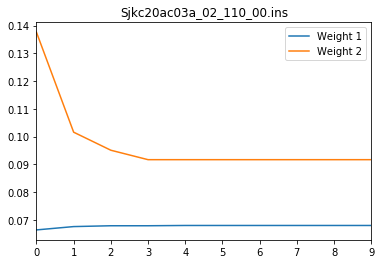

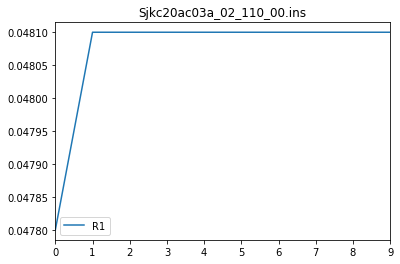

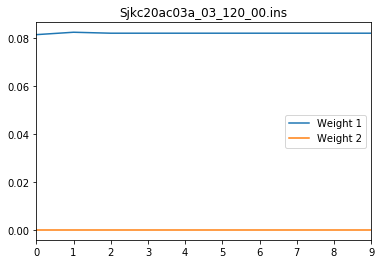

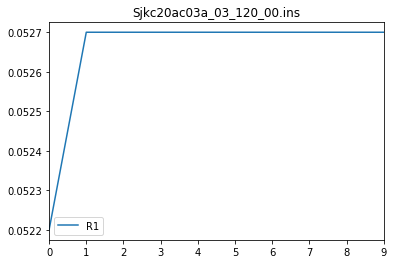

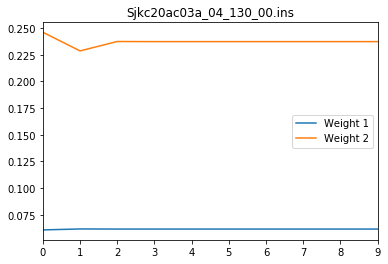

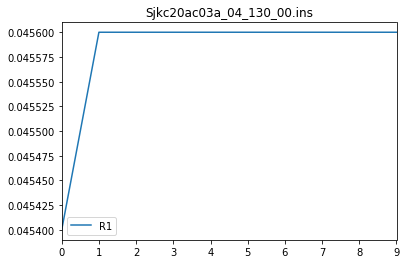

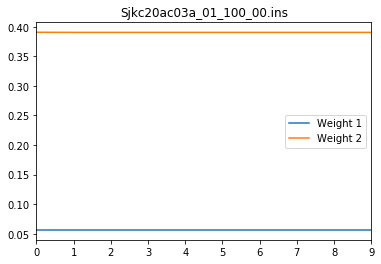

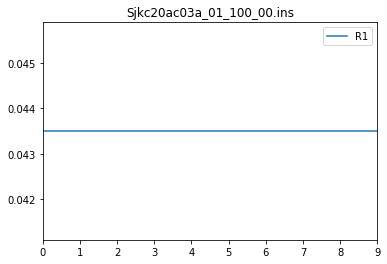

In [48]:
# All we need to do now is call our function with our working directory, and the desired number of refinement cycles as the input
run_multiple_shelxl(working_directory, number_of_refinements)

# Improving Automation
We have shown how we can change the number of times that SHELXL runs, but there is no need to do this manually! Instead, we can automate a simple check for convergence. 

## How can we tell if the structure has converged?
The .lst file provides a 'running commentary' on what SHELXL is doing. Included are the 'mean shifts' for each of the least squares refinements. It is default for each execution of SHELXL to run four iterations of a least squares refinement. By comparing the first and last iterations we can gague what our structure is doing. We need both the first and last mean shift, because the last shift may be significantly lower than the first shift obtained on a second execution of SHELXL. If we just look at the last shift, we are likely to under-refine our structure. 

The shifts are stored in variables and plotted into a graph at the end so you can check how well the structure has converged. If you are unhappy with the end result, it is a simple matter of changing the tolerance of the convergence check. Or you can use the previous script and set the number of refinement cycles. 

## Tutorial Task 4
* Check for convergence 
* Edit tolerance on convergence 

#### Importing Libraries

For statistical analysis to check for convergence, an additional statistics library is used.

In [114]:
from statistics import mean

#### Defining Variables

Two additional variables are needed to tailor the convergence check. These values will change the tolerance on the function. Only the most recent values of the shift will be used to take the average to avoid the affect of initial high outliers. The first variable ('number_of_shifts_to_average') allows for you to choose how many you want to average. The second variable ('average_shift_threshold') is the target value for the average to reach. It may be useful to purposefully set the average threshold very low to see if your structure is stuck bouncing in a loop, or if it simply needs more refinements. 

In [115]:
# How many shifts will be considered for the average (note that they will be the most recent ones)
number_of_shifts_to_average = 8
# The target value for the average shift to be
average_shift_threshold = 0.001

#### Some small edits to the import function

Since we are importing our reference file into the new files, we do not need to output to a different file (or specify the output file as a variable! - this new function reflects that by using one less input value. 

In [116]:
def import_refinement(file_name):
    with open(reference_path, "rt") as reference:
        ref = reference.read()
    ref_x = re.search("LATT", ref)
    ref_y = re.search("END", ref)

    with open(file_name, "rt") as new_file:
        new_cell = new_file.read()

    new_x = re.search("TITL", new_cell)
    new_y = re.search("LATT", new_cell)

    if new_x is None or new_y is None or ref_x is None or ref_y is None:
        print(
            "Invalid file - check that you have the correct syntax in the file with reference to the above two examples"
        )
        print(
            "Particularly check for the presence of TITL, LATT, and END in your files"
        )
    else:
        complete_file = (
            new_cell[new_x.start() : new_y.start()] + ref[ref_x.start() : ref_y.end()]
        )

    with open(file_name, "w") as combined:
        for line in complete_file:
            combined.write(line)

#### A New Function

This is a new function that will check for convergence

In [110]:
def convergence_check(input_file, shift, X, Y):

    # Defines the convergence variable and sets it initially to False
    convergence = False

    # Reads in the .lst file
    with open(input_file, "rt") as refinement:
        lines = refinement.readlines()

    # Defines an empty variable to store the shifts
    shift_param = []

    # Searches the .lst file for the 'Mean shift' expression and saves it to a variable
    for line in lines:
        if "Mean shift" in line:
            shift_param.append(line)

    # Extracts the shift associated with each least squares refinement for the purpose of graphical display
    for item in shift_param:
        shift.append(float(item.split(" ")[6]))

    # This is the condition for convergence (the tolerance of which can be edited)
    # It is looking for the most recent 'X' shifts, and seeing if their average is less than or equal to Y
    if mean(shift[-X:]) <= Y:
        convergence = True
        print("Refinement has converged")
    else:
        convergence = False
        print("Refinement has not converged")

    # The function returns the convergence variable as the output
    return convergence, shift

#### The Final Refinement Function

The final version of the refinement function is given below. 

In [111]:
def run_shelxl(starting_directory, shift_number, shift_threshold):
    os.chdir(starting_directory)
    for run in os.listdir():
        if os.path.isdir(run):
            os.chdir(run)
            for item in os.listdir():
                if item.endswith(".ins"):
                    print("Refining " + item)
                    stem = pathlib.Path(item).stem
                    import_refinement(item)
                    df_weights = pd.DataFrame()
                    df_r_factor = pd.DataFrame()
                    df_shifts = pd.DataFrame()
                    weight_list_1 = []
                    weight_list_2 = []
                    refinement_shifts = []
                    r_factor_list = []

                    # Sets up a convergence flag
                    convergence = False

                    # Sets up an index
                    index = 0

                    # This loop will run until either the refinement converges, or it has been run 20 times (this value can be changed!)
                    while convergence == False and index < 20:
                        index += 1
                        weight = ""
                        shelxl = subprocess.call(["shelxl", stem])
                        shutil.copy(stem + ".res", item)
                        with open(stem + ".res", "rt") as refinement:
                            lines = refinement.readlines()
                            end_flag = False
                            for line in lines:
                                if end_flag == True and "WGHT" in line:
                                    weight = line
                                    weight_list_1.append(float(line.split(" ")[6]))
                                    weight_list_2.append(float(line.split(" ")[12]))
                                elif "END" in line:
                                    end_flag = True
                        with open(item, "rt") as initial:
                            lines = initial.readlines()
                        ACTA_flag = False
                        for line in lines:
                            if "ACTA" in line:
                                ACTA_flag = True
                        with open(item, "w") as initial:
                            for line in lines:
                                if "WGHT" in line and ACTA_flag == False:
                                    print("ACTA not present in file, adding now")
                                    initial.write("ACTA \n")
                                    ACTA_flag = True
                                    initial.write(weight)
                                elif "WGHT" in line and ACTA_flag == True:
                                    initial.write(weight)
                                else:
                                    initial.write(line)
                        with open(stem + ".lst", "rt") as lst_file:
                            lst_lines = lst_file.readlines()
                        for line in lst_lines:
                            if "R1" and "merging for Fourier" in line:
                                r_factor_list.append(float(line.split(" ")[4]))

                        # This feeds the .lst file into the convergence check function
                        convergence, refinement_shifts = convergence_check(
                            stem + ".lst",
                            refinement_shifts,
                            shift_number,
                            shift_threshold,
                        )

                    file_size = os.stat(item)
                    if file_size.st_size < 1:
                        print("Refinement of " + item + " failed")
                    else:
                        print("Refinement of " + item + " successful")

                    # Graphical output for the changing weights
                    df_weights["Weight 1"] = weight_list_1
                    df_weights["Weight 2"] = weight_list_2
                    df_weights.plot(
                        y=["Weight 1", "Weight 2"],
                        use_index=True,
                        title=item + " Weights",
                    )

                    # Graphical output for the changing shifts
                    df_shifts["Shift"] = refinement_shifts
                    df_shifts.plot(
                        y="Shift", use_index=True, title=item + " Convergence"
                    )

                    # Graphical output for the changing r-factor
                    df_r_factor["R1"] = r_factor_list
                    df_r_factor.plot(
                        y=["R1"], use_index=True, title=item + " R1 Factors"
                    )

            os.chdir("..")

#### Calling the Function 

Finally, we will call our refinement function. 

Refining Sjkc20ac03a_02_110_00.ins
ACTA not present in file, adding now
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement of Sjkc20ac03a_02_110_00.ins successful
Refining Sjkc20ac03a_03_120_00.ins
ACTA not present in file, adding now
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not con

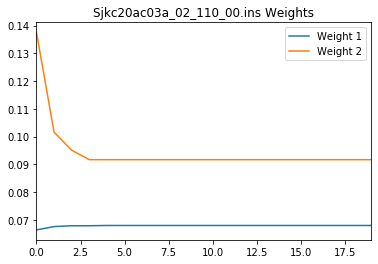

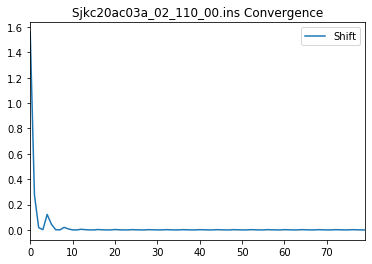

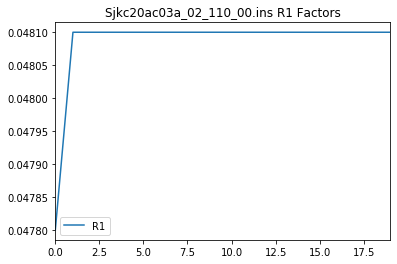

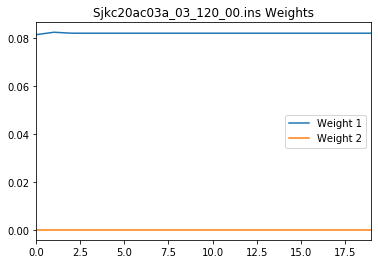

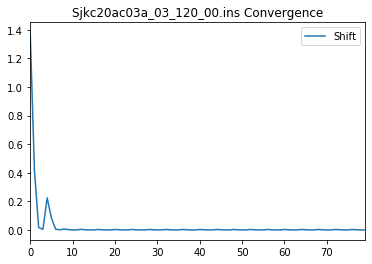

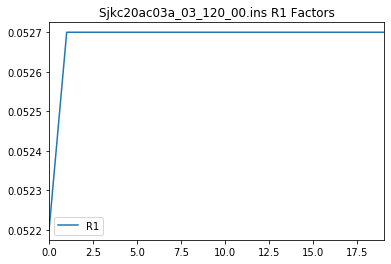

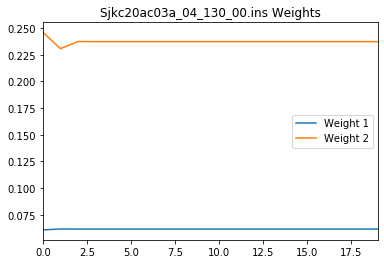

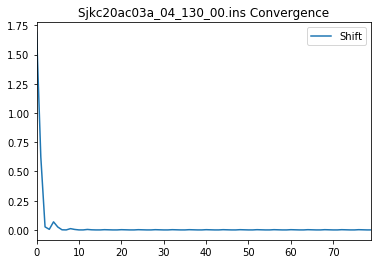

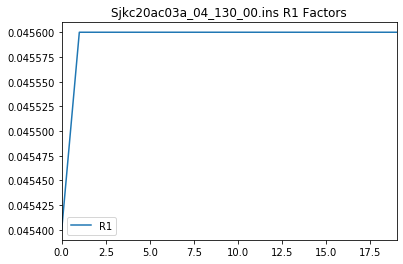

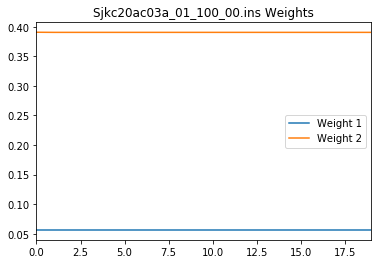

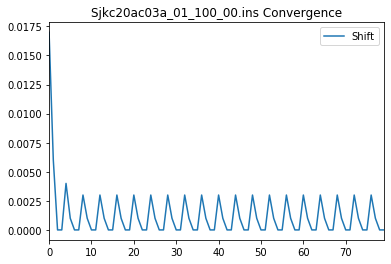

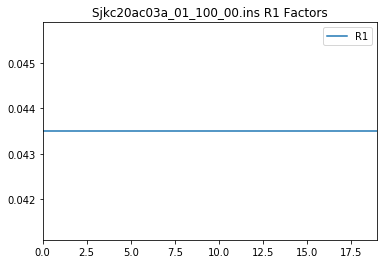

In [112]:
run_shelxl(working_directory, number_of_shifts_to_average, average_shift_threshold)

# Final Notes

Excellent! You are now able to refine a series of structures based off a reference automatically! 

:)   :)   :)   :)   :)   :)   :) 

However, if you check the SHELXL_ref.py available at https://github.com/erikssod/CXpipeline , you may notice that the code looks a little different! This is because the code is structured to fit into a pipeline for full automatic analysis. If bulk refinement is your only wish, then this notebook will suit perfectly! Otherwise, consider checking out CXpipeline for the full scripts. 

## A Stand Alone Script

If you are revisiting this tutorial to refine a series of structures (but already understand how the code works!), feel free to use the below block of code. It is designed to be stand alone - it is also written as a class, which is an important concept in Object Orientated Programming (or OOP for short). 

You have successfully entered a valid path for the reference structure
You have successfully entered a valid path to your working directory
Refining 22_310_00
Refining Stf20at05a_22_310_00.ins
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has converged
Refinement of Stf20at05a_22_310_00.ins successful
Refining 11_200_00
Refining Stf20at05a_11_200_00.ins
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has converged
Refinement of Stf20at05a_11_200_00.ins successful
Refining 51_400_00
Refining Stf20at05a_51_400_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instan

/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has converged
Refinement of Stf20at05a_02_110_00.ins successful
Refining 31_400_00
Refining Stf20at05a_31_400_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly


/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement Failed Instantly
Refinement Failed Instantly
Refinement of Stf20at05a_31_400_00.ins failed
nothing to display
nothing to display
nothing to display
Refining 03_120_00
Refining Stf20at05a_03_120_00.ins
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has converged
Refinement of Stf20at05a_03_120_00.ins successful
Refining 77_140_00
Refining 42_490_00
Refining Stf20at05a_42_490_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement

/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement of Stf20at05a_42_490_00.ins failed
nothing to display
nothing to display
nothing to display
Refining 74_170_00
Refining 55_360_00
Refining Stf20at05a_55_360_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
R

/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refining 26_350_00
Refining Stf20at05a_26_350_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement of Stf20at05a_26_350_00.ins failed
nothing to display
nothing to display
nothing to display
Refining 46_450_00
Refining Stf20at05a_46_450_00.ins
Invalid file - check that you have the correct synt

/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has converged
Refinement of Stf20at05a_05_140_00.ins successful
Refining 23_320_00
Refining Stf20at05a_23_320_00.ins


/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has converged
Refinement of Stf20at05a_23_320_00.ins successful
Refining 27_360_00
Refining Stf20at05a_27_360_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Fai

/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has converged
Refinement of Stf20at05a_25_340_00.ins successful
Refining 72_190_00
Refining 15_240_00
Refining Stf20at05a_15_240_00.ins


/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has converged
Refinement of Stf20at05a_15_240_00.ins successful
Refining 71_200_00
Refining 36_450_00
Refining Stf20at05a_36_450_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Insta

/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement of Stf20at05a_40_490_00.ins failed
nothing to display
nothing to display
nothing to display
Refining 44_470_00
Refining Stf20at05a_44_470_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed In

/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement of Stf20at05a_30_390_00.ins failed
nothing to display
nothing to display
nothing to display
Refining 18_270_00
Refining Stf20at05a_18_270_00.ins
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has converged
Refinement of Stf20at05a_18_270_00.ins successful
Refining 28_370_00
Refining Stf20at05a_28_370_00.ins
Invalid file - check that you have the

/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement of Stf20at05a_52_390_00.ins failed
nothing to display
nothing to display
nothing to display
Refining 37_460_00
Refining Stf20at05a_37_460_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed In

/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has converged
Refinement of Stf20at05a_06_150_00.ins successful
Refining 08_170_00
Refining Stf20at05a_08_170_00.ins


/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has converged
Refinement of Stf20at05a_08_170_00.ins successful
Refining 58_330_00
Refining Stf20at05a_58_330_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement of St

/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement of Stf20at05a_61_300_00.ins failed
nothing to display
nothing to display
nothing to display
Refining 49_420_00
Refining Stf20at05a_49_420_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed In

/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement of Stf20at05a_66_250_00.ins failed
nothing to display
nothing to display
nothing to display
Refining 76_150_00
Refining 50_410_00
Refining Stf20at05a_50_410_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
R

/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement of Stf20at05a_43_480_00.ins failed
nothing to display
nothing to display
nothing to display
Refining 13_220_00
Refining Stf20at05a_13_220_00.ins
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has converged
Refinement of Stf20at05a_13_220_00.ins successful
Refining 29_380_00
Refining Stf20at05a_29_380_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantl

/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement Failed Instantly
Refinement of Stf20at05a_29_380_00.ins failed
nothing to display
nothing to display
nothing to display
Refining 62_290_00
Refining Stf20at05a_62_290_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement of Stf20at05a_62_290_00.ins failed
nothing to display
nothing to 

/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement of Stf20at05a_59_320_00.ins failed
nothing to display
nothing to display
nothing to display
Refining 01_100_00
Refining Stf20at05a_01_100_00.ins
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has not converged
Refinement has converged
Refinement of Stf20at05a_01_100_00.ins successful
Refining 81_100_00
Refining 54_370_00
Refining Stf20at05a_54_370_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refineme

/home/amy/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement of Stf20at05a_54_370_00.ins failed
nothing to display
nothing to display
nothing to display
Refining 67_240_00
Refining Stf20at05a_67_240_00.ins
Invalid file - check that you have the correct syntax in the file with reference to the above two examples
Particularly check for the presence of TITL, LATT, and END in your files
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement Failed Instantly
Refinement of Stf20a

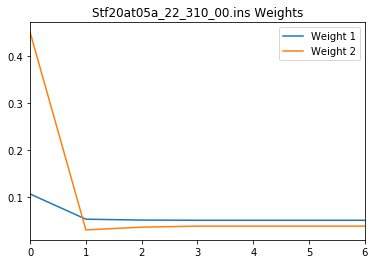

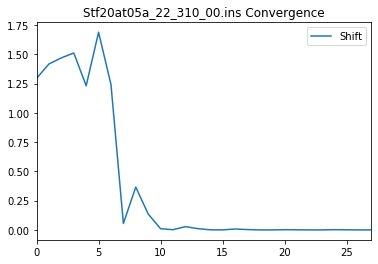

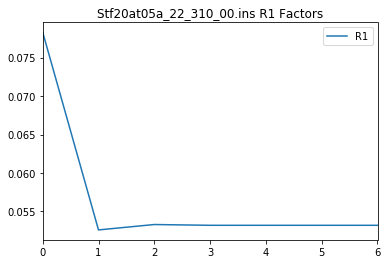

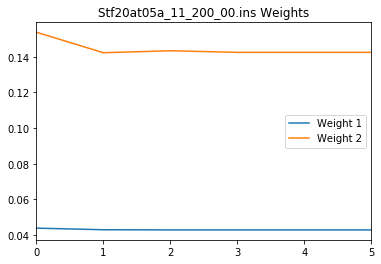

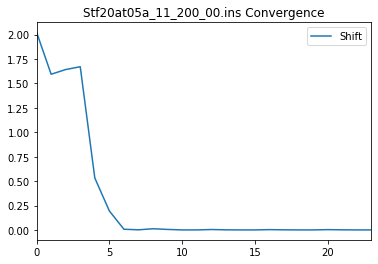

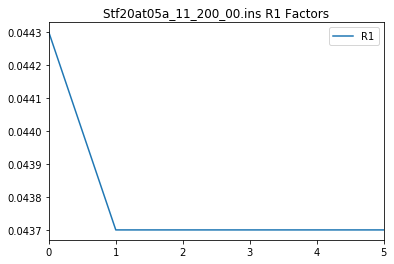

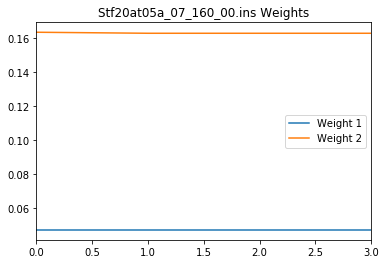

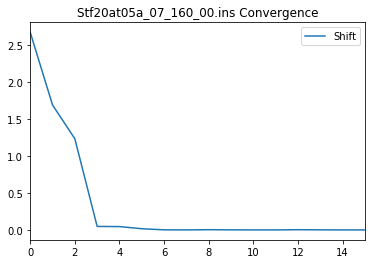

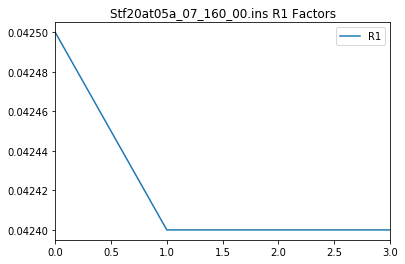

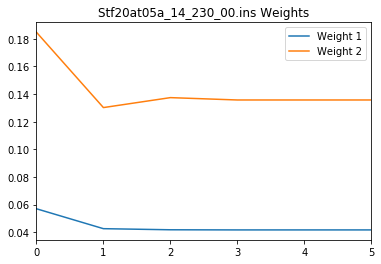

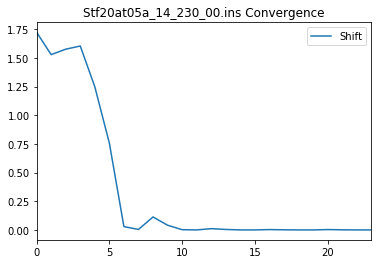

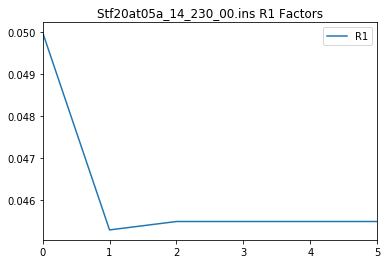

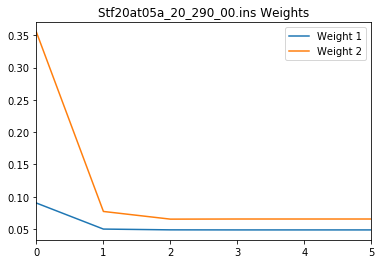

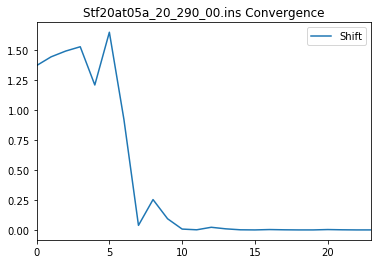

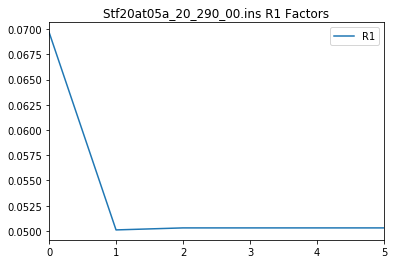

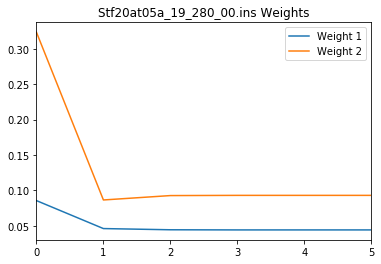

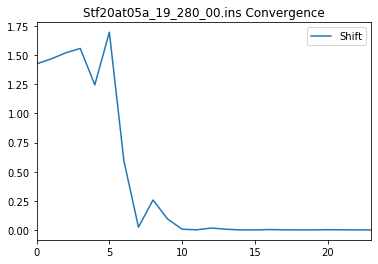

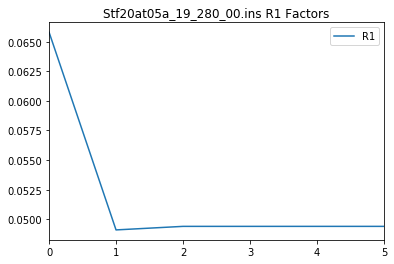

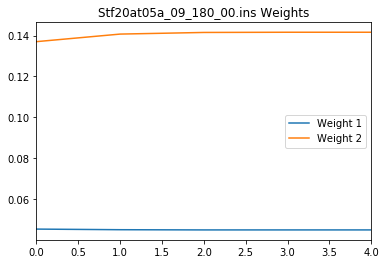

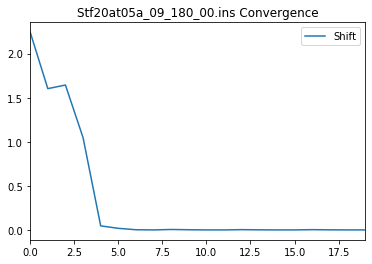

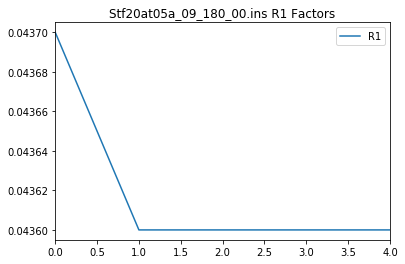

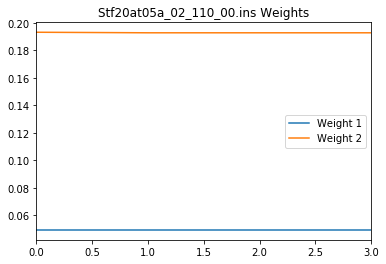

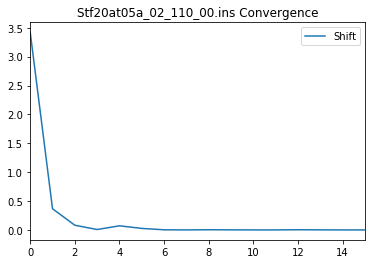

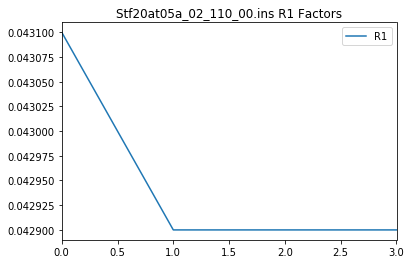

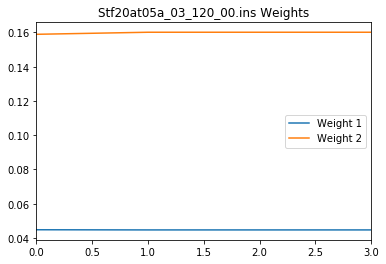

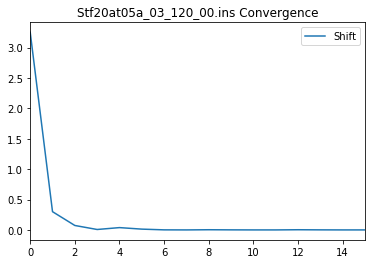

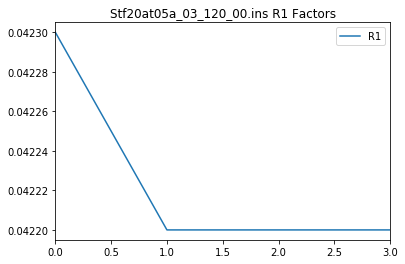

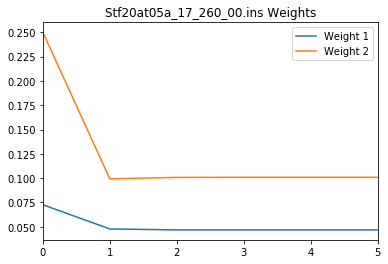

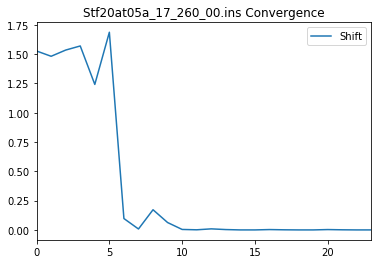

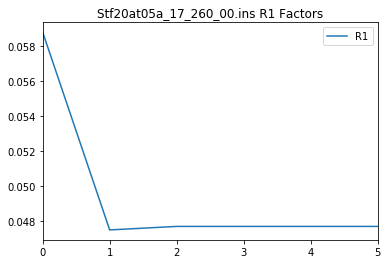

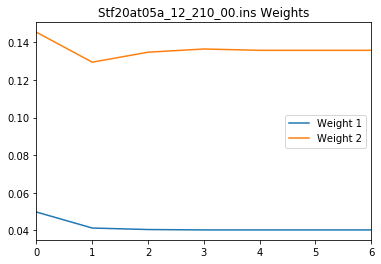

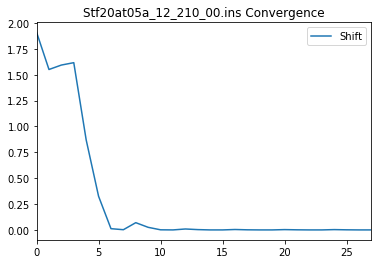

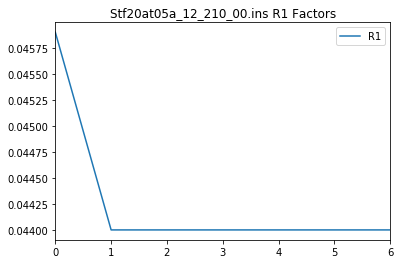

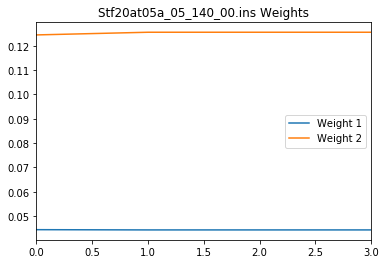

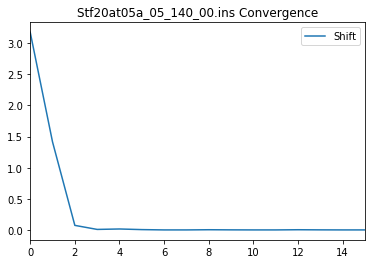

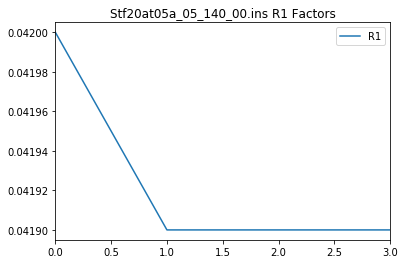

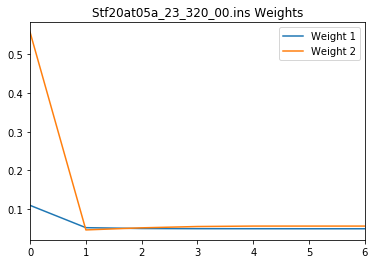

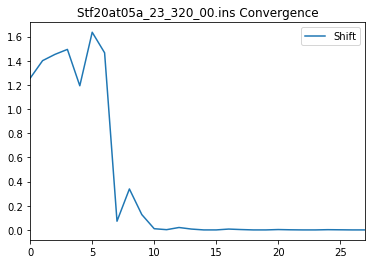

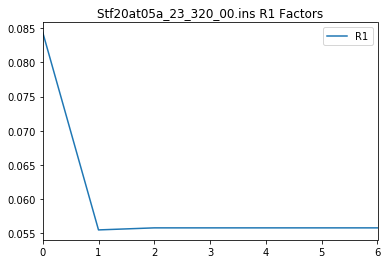

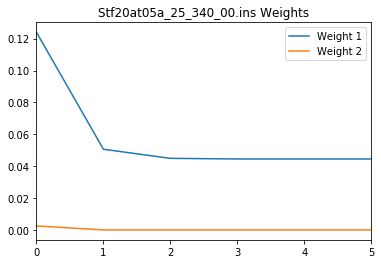

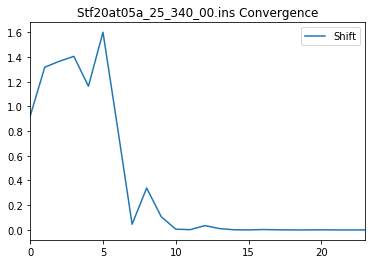

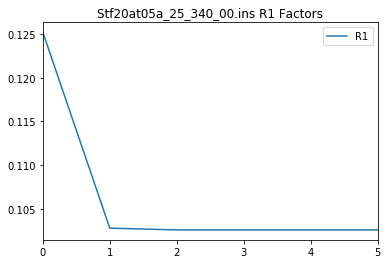

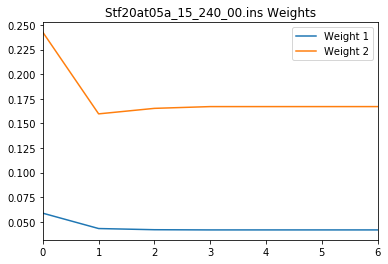

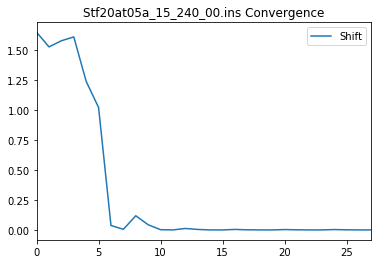

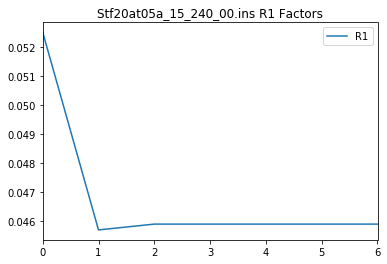

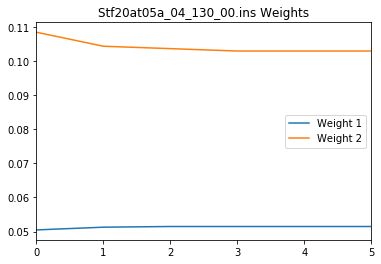

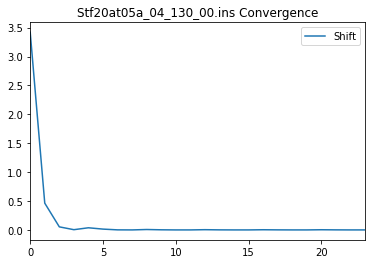

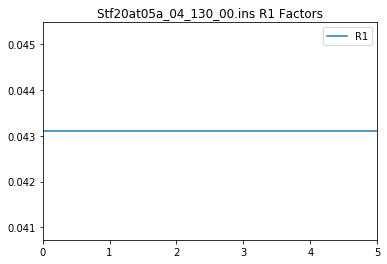

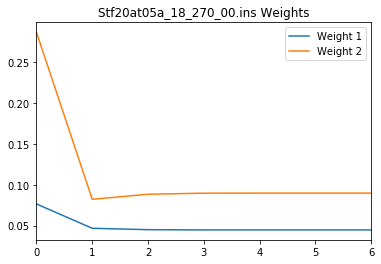

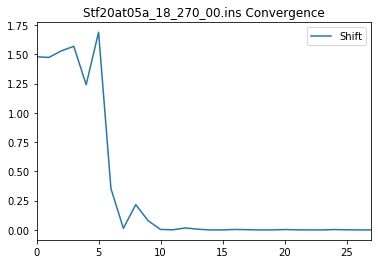

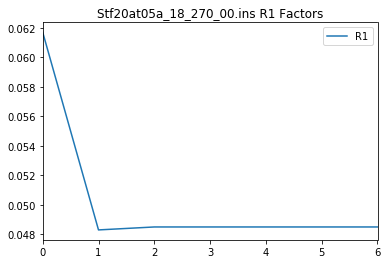

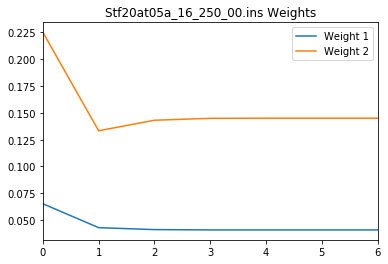

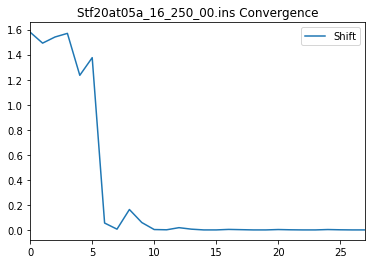

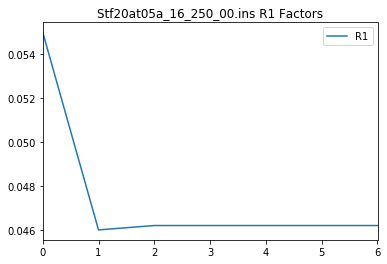

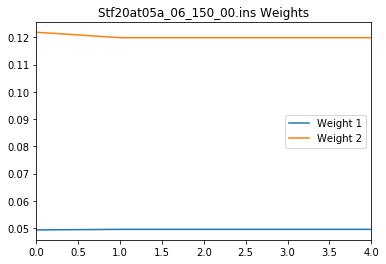

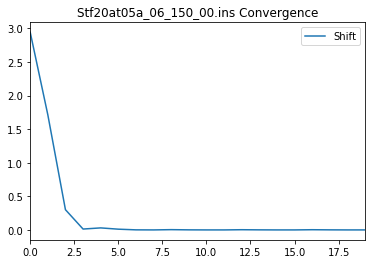

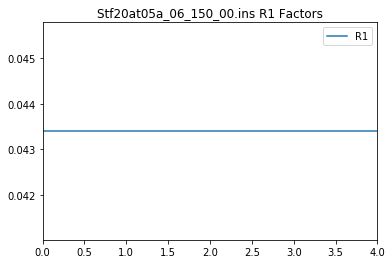

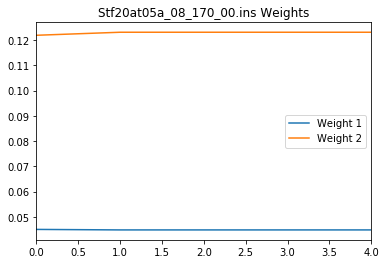

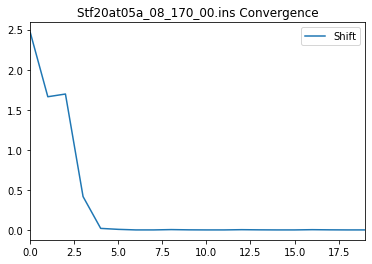

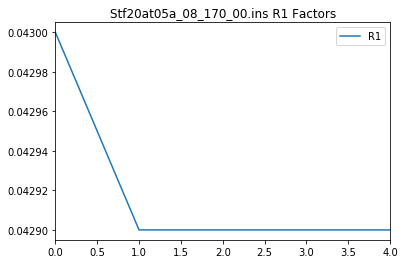

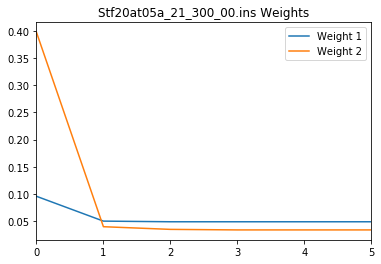

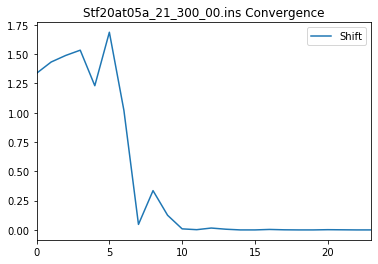

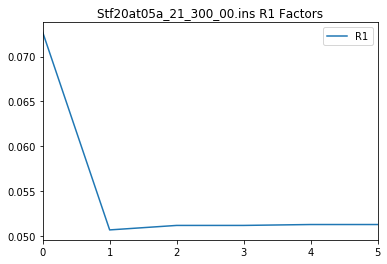

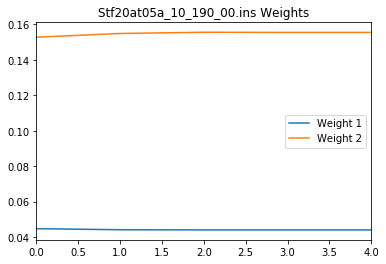

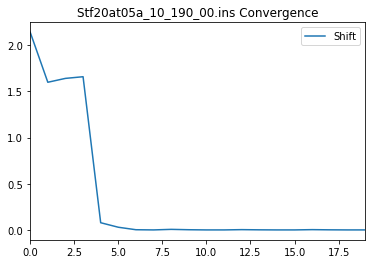

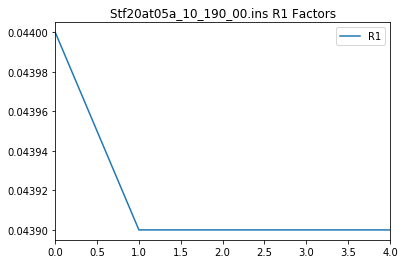

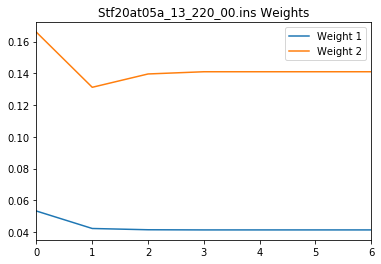

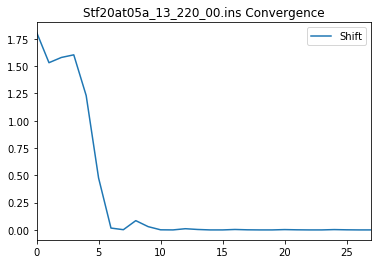

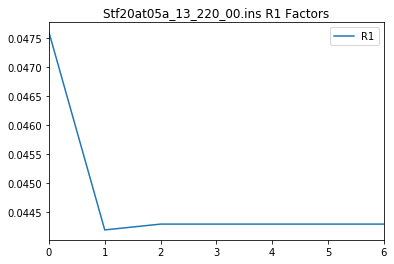

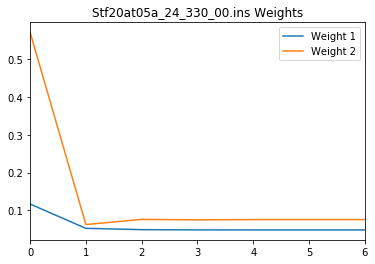

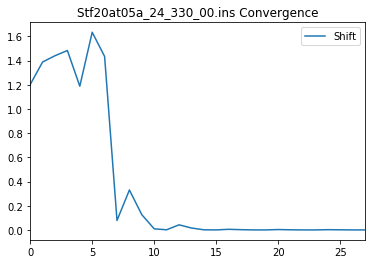

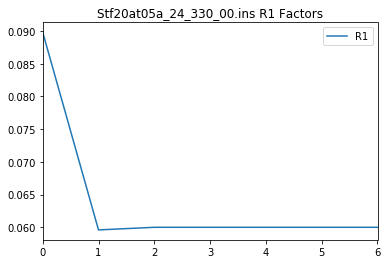

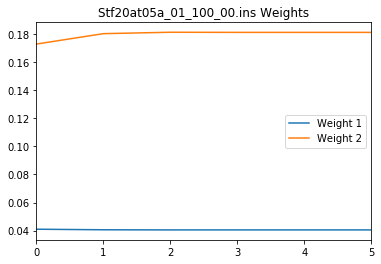

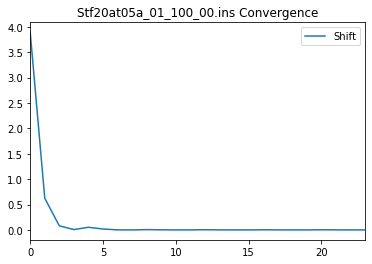

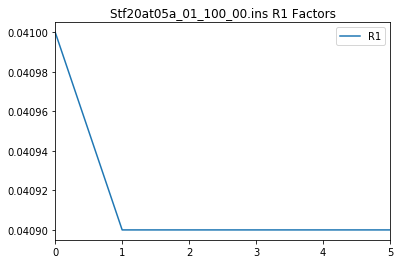

In [3]:
# Import required libraries

import re
import os
import shutil
import subprocess
import pathlib
import pandas as pd
from statistics import mean

# Edit the below variables to set up the script

working_directory = pathlib.Path(
    r"/home/amy/Documents/analysis/Tomislav_VT/Stf20at05a/Mo"
)
reference_path = pathlib.Path(r"/home/amy/Documents/analysis/Tomislav_VT/ref.ins")
number_of_shifts_to_average = 8
average_shift_threshold = 0.001

# The below functions have been compiled into the class SHELXL
# This means that an object which is defined to have this class, has access to all of the functions of that object
# This is the same way that strings in python (a class) have built in functions like 'append()'
# This is very powerful, as classes can be imported into python like libraries
# This allows for greater reusability and organisation of code


class SHELXL:
    def __init__(self, directory, reference, average, threshold):
        self.working_directory = directory
        self.reference_path = reference
        self.average = average
        self.threshold = threshold
        if os.path.exists(self.reference_path) == True:
            print(
                "You have successfully entered a valid path for the reference structure"
            )
        else:
            print(
                "Check your syntax for the path of your reference structure - path not valid"
            )
        if os.path.isdir(pathlib.Path(self.working_directory).parent):
            print(
                "You have successfully entered a valid path to your working directory"
            )
        else:
            print("Check your syntax for the path of your working directory")

    def import_refinement(self, file_name):
        with open(self.reference_path, "rt") as reference:
            ref = reference.read()
        ref_x = re.search("LATT", ref)
        ref_y = re.search("END", ref)

        with open(file_name, "rt") as new_file:
            new_cell = new_file.read()

        new_x = re.search("TITL", new_cell)
        new_y = re.search("LATT", new_cell)

        if new_x is None or new_y is None or ref_x is None or ref_y is None:
            print(
                "Invalid file - check that you have the correct syntax in the file with reference to the above two examples"
            )
            print(
                "Particularly check for the presence of TITL, LATT, and END in your files"
            )
        else:
            complete_file = (
                new_cell[new_x.start() : new_y.start()]
                + ref[ref_x.start() : ref_y.end()]
            )

            with open(file_name, "w") as combined:
                for line in complete_file:
                    combined.write(line)

    def convergence_check(self, input_file, shift, X, Y):
        convergence = False
        with open(input_file, "rt") as refinement:
            lines = refinement.readlines()
        shift_param = []
        for line in lines:
            if "Mean shift" in line:
                shift_param.append(line)
        for item in shift_param:
            shift.append(float(item.split(" ")[6]))
        try:
            mean(shift[-X:])
        except:
            print("Refinement Failed Instantly")
            convergence = False
        else:
            if mean(shift[-X:]) <= Y:
                convergence = True
                print("Refinement has converged")
            else:
                convergence = False
                print("Refinement has not converged")

        return convergence, shift

    def run_shelxl(self):
        os.chdir(self.working_directory)
        for run in os.listdir():
            if os.path.isdir(run):
                os.chdir(run)
                print("Refining " + run)
                for item in os.listdir():
                    if item.endswith(".ins"):
                        print("Refining " + item)
                        stem = pathlib.Path(item).stem
                        self.import_refinement(item)
                        df_weights = pd.DataFrame()
                        df_r_factor = pd.DataFrame()
                        df_shifts = pd.DataFrame()
                        weight_list_1 = []
                        weight_list_2 = []
                        refinement_shifts = []
                        r_factor_list = []
                        convergence = False
                        index = 0
                        while convergence == False and index < 20:
                            index += 1
                            weight = ""
                            shelxl = subprocess.call(["shelxl", stem])
                            shutil.copy(stem + ".res", item)
                            with open(stem + ".res", "rt") as refinement:
                                lines = refinement.readlines()
                                end_flag = False
                                for line in lines:
                                    if end_flag == True and "WGHT" in line:
                                        weight = line
                                        weight_list_1.append(float(line.split(" ")[6]))
                                        weight_list_2.append(float(line.split(" ")[12]))
                                    elif "END" in line:
                                        end_flag = True
                            with open(item, "rt") as initial:
                                lines = initial.readlines()
                            ACTA_flag = False
                            for line in lines:
                                if "ACTA" in line:
                                    ACTA_flag = True
                            with open(item, "w") as initial:
                                for line in lines:
                                    if "WGHT" in line and ACTA_flag == False:
                                        print("ACTA not present in file, adding now")
                                        initial.write("ACTA \n")
                                        ACTA_flag = True
                                        initial.write(weight)
                                    elif "WGHT" in line and ACTA_flag == True:
                                        initial.write(weight)
                                    else:
                                        initial.write(line)
                            with open(stem + ".lst", "rt") as lst_file:
                                lst_lines = lst_file.readlines()
                            for line in lst_lines:
                                if "R1" and "merging for Fourier" in line:
                                    r_factor_list.append(float(line.split(" ")[4]))

                            convergence, refinement_shifts = self.convergence_check(
                                stem + ".lst",
                                refinement_shifts,
                                self.average,
                                self.threshold,
                            )

                        file_size = os.stat(item)
                        if file_size.st_size < 1:
                            print("Refinement of " + item + " failed")
                        else:
                            print("Refinement of " + item + " successful")

                        df_weights["Weight 1"] = weight_list_1
                        df_weights["Weight 2"] = weight_list_2
                        try:
                            df_weights.plot(
                                y=["Weight 1", "Weight 2"],
                                use_index=True,
                                title=item + " Weights",
                            )
                        except:
                            print("nothing to display")
                        df_shifts["Shift"] = refinement_shifts
                        try:
                            df_shifts.plot(
                                y="Shift", use_index=True, title=item + " Convergence"
                            )
                        except:
                            print("nothing to display")
                        df_r_factor["R1"] = r_factor_list
                        try:
                            df_r_factor.plot(
                                y=["R1"], use_index=True, title=item + " R1 Factors"
                            )
                        except:
                            print("nothing to display")

                os.chdir("..")


# Here we create an object called 'refinement' which is an instance of the SHELXL class
# We provide the necessary variables to the class, and then call the function run_shelxl()

refinement = SHELXL(
    working_directory,
    reference_path,
    number_of_shifts_to_average,
    average_shift_threshold,
)
refinement.run_shelxl()